# Capstone Project "Battle of Neighbourhoods" 2019



## Table of Contents
- Introduction
- Objectives
- Data Description
- Methodology
- Analyze Frankfurts venues
- K-mean Cluster for Frankfurt
- Results
- Discussion
- Conclusion

## Introduction

**A good opportunity for sustainable business?**
In my repost I answer this question. 

According to new data, diners are increasingly ditching meat and opting for more **vegetarian and vegan** dishes instead - with meat replacement, jackfruit, seaweed, and aquafaba set to be popular this year.
It appears from the research that chefs believe consumers are more conscious about what they are eating, both from a health perspective and a sustainability point of view," Jo Smith, Web Content & Merchandising Manager, from Nisbets said in a statement sent to Plant Based News.
As consclusion, investing in vegan/vegetarian products and venues is clearly profitable nowadays. 
The alternative meat industry is expected to become a **$140 billion industry** in the next decade. That means it’s about to get a lot more crowded.

In my survey I will compare different neighbourhoods for a new vegan/vegetarian venue opening in 5th largest and the most international city of Germany : **Frankfurt am Main**.
Frankfurt  is the financial center of the continent, the European city, the transport hub, the smallest metropolis in the world.  Cities population is growing and represents cultures from all over the world – which makes it a perfect spot to target potential audience. 




## Objective

In this capstone project, I will review  the neighbourhoods classification using Foursquare data and machine learning segmentation and clustering. The aim of this project is to segment the neighbourhoods of Frankfurt am Main  based on the most common food venues accordinig to Foursquare.


Using segmentation and clustering, we hope we can determine:

- The similarity or dissimilarirty of neighbourhoods regarding the variety of food venues. 
- Classification of area by popular food venues and where to find the best spot for opening a new venue.  

## Data Description

For my project, I had to find datasets regarding the geographical properties of Frankfurt. Those were available at the below mentioned "open data" website provided by governmental institutions as csv format. ​

http://offenedaten.frankfurt.de/dataset/strassenverzeichnis-der-stadt-frankfurt-am-main/resource/be5982fe-ed79-42f4-acdc-57ca4737fb7a?inner_span=True
As the dataset was not providing longitudes and latitudes I had to merge it with another dataset for german cities. from Aggdata.com The website provides free information for certain data sets for worldwide locations, registration is required there though.   https://www.aggdata.com/free/germany-postal-codes​

I prepared and cleaned the data sets in "Refinery" at watson studio on IBM cloud. Encoding to UTM, translating and dropping several rows were the necessary steps before I could start to work with the data. 
For my venue research, I used Foursquare API. The requests in the free package are limited and I recommend to everyone who has limited time to work on the project keep that in mind . This way, you don't have to wait till next day to send a rest again. ​

Finally, I used Google Maps search to apply my 'searchnearby' fuction ​

As I am not a native English speaker, I used the free tool Grammarly to improve my writing​

The community of Github and Stackflow was a big help for finishing this project as I am not skilled in coding

​

In [2]:
!conda install -c conda-forge geopy 

!conda install -c conda-forge folium=0.5.0 


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

#### In the first step I installed conda enviroments and imported the neseccary libraries
#### in the process I did not need all of them, though it is always a good idea to be prepared

In [3]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import json
from geopy.geocoders import Nominatim   
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from sklearn import preprocessing
print('Libraries imported')

Libraries imported


#### In the first step I was looking for a data set of Frankfurt am Main neighbourhood data.
#### I found a suitable one on following website.
####  http://offenedaten.frankfurt.de/dataset/strassenverzeichnis-der-stadt-frankfurt-am-main/resource/be5982fe-ed79-42f4-acdc-57ca4737fb7a?inner_span=True
####  The data set contains adresses of gouvermental institutes including streets, postal codes and eigbourhoods. 
####  I refined the data set in watson studio, removing and renaming columns and rows and translating into english



In [4]:
# The code was removed by Watson Studio for sharing.

,House Number,Street Name,Neighbourhood,Postal Code
0,3660,Adolf-Meyer-Strasse,Kalbach-Riedberg,60438
1,3753,Alexander-Todd-Strasse,Niederursel,60438
2,44,Alte Falterstrasse,Griesheim,65933
3,53,Alt-Eschersheim,Eschersheim,60433
4,72,Alt-Seckbach,Seckbach,60389


#### I removed the House Nr. and the Street name, as those are not relevant

In [5]:
ffm_df = ffm_df.drop(["House Number","Street Name"], axis = 1)
ffm_df.head()
ffm_df.shape



(4393, 2)

#### In the second step I was looking for a data set of Frankfurt am Main Geo-data.
#### I found a suitable one on following website. You have to sign up for getting the data sets.
#### https://www.aggdata.com/free/germany-postal-codes
#### The data set contains all cities of Germany including postal codes, longtitudes and latitudes. 
#### I refined the data set for Frankfurt only  in watson studio, removing and renaming columns and rows and translating into english¶
#### Also deleted the state column "COLUMN3"

In [6]:
body = client_fd78162546b14457a9e46466ef4ff88a.get_object(Bucket='capstonebattle-donotdelete-pr-cdssf4djzlt1tx',Key='data_asset/plz_neu.csv_shaped_790bfe4e.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

geo_df = pd.read_csv(body)
geo_df = geo_df.drop('COLUMN3', axis = 1)
geo_df.head()


,Postal Code,City,Latitude,Longitude
0,60311,Frankfurt am Main,50.1104,8.6718
1,60316,Frankfurt am Main,50.1193,8.6980
2,60322,Frankfurt am Main,50.1319,8.6838
3,60326,Frankfurt am Main,50.1019,8.6342
4,60385,Frankfurt am Main,50.1264,8.7089


In [7]:
geo_df.shape

(39, 4)

#### In next step I merge both given dataframes to get Neighbourhoods, Postal Codes and Geodata together in one datast for Frankfurt



In [8]:
#Data Set to work with later on as it includes all important information
frankfurt_df = pd.merge(ffm_df, geo_df, on='Postal Code',)
frankfurt_df = frankfurt_df.drop_duplicates(['Neighbourhood','Latitude', 'Postal Code'], keep='first')
frankfurt_df.head()

,Neighbourhood,Postal Code,City,Latitude,Longitude
0,Kalbach-Riedberg,60438,Frankfurt am Main,50.1167,8.6833
1,Niederursel,60438,Frankfurt am Main,50.1167,8.6833
109,Griesheim,65933,Frankfurt am Main,50.1001,8.6036
128,Gutleutviertel,65933,Frankfurt am Main,50.1001,8.6036
231,Nied,65933,Frankfurt am Main,50.1001,8.6036


#### Now we can visualize the postal codes given with geodata
#### For this step I installed ind important all the neccessary libriaries and enviroments

In [9]:
address = 'Frankfurt am Main'
geolocator = Nominatim(user_agent="mrsfsfailor@gmx.dessss")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Frankfurt am Main are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Frankfurt am Main are 50.1106444, 8.6820917.


#### In case You have to face the same proble: I had difficulties in the beginning to render the map, it was blank. After I reduced and merged the data  the map loaded immediately


In [10]:
import folium
map_ffm = folium.Map(location=[latitude, longitude], zoom_start=11)
html_string = map_ffm.get_root().render()

# create map of Frankfurt using latitude and longitude values

# add markers to map
for lat, lng, stat in zip(frankfurt_df['Latitude'], frankfurt_df['Longitude'], frankfurt_df['Postal Code']):    
    label = '{}'.format(frankfurt_df['Postal Code'])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ffm)  


In [11]:
map_ffm

## Methodology

In this project, I will use the basic methodology as taught in Week 3 lab.
The result of my refined dataset shows the the neighbourhoods and postal codes of Frankfurt 
It contains 4393 rows of data. To be mentioned, Frankfurt officially has 46 neighbourhoods.

As the first dataset did not containcoordinates, I had to merge it with another dataset from agg data to get equivalent latitude and longitude values.

I used geolocator and folium to create a map  to visualize the postal codes. It may happen, that the map is not rendering properly if you are working with too much data, I had to face this problem and luckily found a solution my shrinking my data sets.

In the next step I used the created Foursquare account to find the venues according to Frankfurt coordinates. I used the credentials for the category "vegan/vegetarian" straight away, the credentials for each category are to be found on https://developer.foursquare.com/docs/resources/categories.


#### Connecting to Forsquare API and requsting the information regarding the venues we want to get

In [12]:
CLIENT_ID = 'L0I1PN4S4WBHQGEKH0VAPFOP4Y0RIF1JW1002RQLJ4IBQE5V'   
CLIENT_SECRET = 'VF3NXK2JXGT2L33D3WLHL3GD4CRUVIP3BAFVIH3GX2JYFEJV'
API_VERSION = '20190130' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: L0I1PN4S4WBHQGEKH0VAPFOP4Y0RIF1JW1002RQLJ4IBQE5V
CLIENT_SECRET:VF3NXK2JXGT2L33D3WLHL3GD4CRUVIP3BAFVIH3GX2JYFEJV


#### In the code I specify the Category Id for vegan venues, the Id is to be find
#### The category credentials for the venues are to be find here:
#### https://developer.foursquare.com/docs/resources/categories

In [14]:
neighborhood_lng = frankfurt_df.loc[0, 'Longitude']
neighborhood_lat = frankfurt_df.loc[0, 'Latitude']
radius = 500
LIMIT = 200
categoryId = "4bf58dd8d48988d1d3941735"
url='https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    API_VERSION,
    neighborhood_lat,
    neighborhood_lng,
    radius,
    LIMIT,
   categoryId)
results = requests.get(url).json()
print(results)

{'meta': {'code': 200, 'requestId': '5d9097d6a3061900390fc819'}, 'response': {'venues': []}}


#### Using function getNerbyvenues and sending the request

In [15]:

def getNearbyvenues( names, latitudes, longitudes, radius = 500 ):
    
    venues_list=[]
    for name, lat, lng, in zip( names, latitudes, longitudes ):
        print(name)
        #create request
        url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            API_VERSION,
            lat,
            lng,
            radius,
            LIMIT,
            categoryId)
        
        #make get request
        results=requests.get(url).json()["response"]['groups'][0]['items']
        print(results)
      
        #returning only the relevant information
        venues_list.append([(name,lat,lng,v['venue']['name'],v['venue']['location']['lat'],v['venue']['location']['lng'],
                             v['venue']['categories'][0]['name'], v['venue']['id'] ) for v in results])
        
        nearby_venues= pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns=['Neighbourhood',
                               'Neighbourhood latitude',
                               'Neighbourhood longitude',
                               'Venue',
                               'Venue Latitude',
                               'Venue Longitude',
                               'Venue category',
                               'Id']
    return(nearby_venues)
    print(nearby_venues)

#### The result for all vegetarian/vegan venues in Frankfurt

In [16]:
frankfurt_veg_venues=getNearbyvenues(names=frankfurt_df['Neighbourhood'], latitudes=frankfurt_df['Latitude'],longitudes=frankfurt_df['Longitude'])

Kalbach-Riedberg
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4ce52ef23c87224b30d6b66b', 'name': 'Pommes Freunde', 'location': {'address': 'Zeil 106', 'lat': 50.11473998942019, 'lng': 8.68147540400796, 'labeledLatLngs': [{'label': 'display', 'lat': 50.11473998942019, 'lng': 8.68147540400796}], 'distance': 254, 'cc': 'DE', 'city': 'Frankfurt am Main', 'state': 'Hessen', 'country': 'Deutschland', 'formattedAddress': ['Zeil 106', 'Frankfurt am Main', 'Deutschland']}, 'categories': [{'id': '4bf58dd8d48988d1d3941735', 'name': 'Vegetarian / Vegan Restaurant', 'pluralName': 'Vegetarian / Vegan Restaurants', 'shortName': 'Vegetarian / Vegan', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vegetarian_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4ce52ef23c87224b30d6b66b-0'}, {'reasons': {'count': 0, 'items': [{'summary':

#### The extracted dataframe still contains too many duplicates due to large amount of overlapping Latitudes
#### The duplicates are removed in the next step

In [17]:
frankfurt_veg_venues.head()

,Neighbourhood,Neighbourhood latitude,Neighbourhood longitude,Venue,Venue Latitude,Venue Longitude,Venue category,Id
0,Kalbach-Riedberg,50.1167,8.6833,Pommes Freunde,50.114740,8.681475,Vegetarian / Vegan Restaurant,4ce52ef23c87224b30d6b66b
1,Kalbach-Riedberg,50.1167,8.6833,Loris Restaurant & Cafe,50.115265,8.679416,Vegetarian / Vegan Restaurant,59c100366adbf549791c0557
2,Niederursel,50.1167,8.6833,Pommes Freunde,50.114740,8.681475,Vegetarian / Vegan Restaurant,4ce52ef23c87224b30d6b66b
3,Niederursel,50.1167,8.6833,Loris Restaurant & Cafe,50.115265,8.679416,Vegetarian / Vegan Restaurant,59c100366adbf549791c0557
4,Eschersheim,50.1167,8.6833,Pommes Freunde,50.114740,8.681475,Vegetarian / Vegan Restaurant,4ce52ef23c87224b30d6b66b


#### The venue coordinates are removed and the dataframe is sorted and cleaned again
#### The final result shows us in total 18 vegan/vegetarian venues
#### We can make an observation that the most of them are assigned as Vegan/Vegetarian venue solely, while 4 of them are assigned to japanese/chinese/indian/salad-bar restaurants. This result shows that foursquare delivers quite unrealistic results, as there are many other venues offering mixed menues including at least one vegetarian/vegan cuisine. This result is useful though if purely vegetable venues are desireable


In [18]:

ffm_veg_ven = frankfurt_veg_venues.drop(columns=['Neighbourhood latitude', 'Neighbourhood longitude'])
ffm_veg_ven
ffm_veg_ven_sort = ffm_veg_ven.sort_values('Id', ascending=False).drop_duplicates('Venue')
ffm_veg_ven_sort.reset_index().drop(columns='index')
ffm_veg_ven_sort.reset_index().head()


,index,Neighbourhood,Venue,Venue Latitude,Venue Longitude,Venue category,Id
0,28,Altstadt,Vevay Café,50.112115,8.678600,Vegetarian / Vegan Restaurant,5ce82cacf5e9d7002ce826cc
1,57,Ostend,Rohkosteria,50.120968,8.697504,Vegetarian / Vegan Restaurant,5a97f6f1e65d0c69e96e0b12
2,20,Schwanheim,Loris Restaurant & Cafe,50.115265,8.679416,Vegetarian / Vegan Restaurant,59c100366adbf549791c0557
3,40,Ostend,Picknick Café Bar,50.125427,8.707411,Vegetarian / Vegan Restaurant,5984551282a75040aad941bb
4,72,Bahnhofsviertel,Iimori Gyoza Bar,50.108039,8.657039,Japanese Restaurant,575aae08498e5d5ad984a22c


## Analyze Frankfurts venues

#### With this step I gain an insight of how many venues are in each neighbourhood

In [19]:
ffm_veg_count = ffm_veg_ven_sort.groupby('Neighbourhood').count()
ffm_veg_count.filter(items=['Neighbourhood', 'Venue']) # sorted datafame to work with later


,Venue
Neighbourhood,
Altstadt,3
Bahnhofsviertel,2
Dornbusch,2
Gutleutviertel,1
Innenstadt,3
Nordend-West,2
Oberrad,1
Ostend,2
Sachsenhausen-N,1


#### In this step I request the veneues for all venues in Frankfurt to compare it with vegan venues dataset


In [29]:
CLIENT_ID = 'L0I1PN4S4WBHQGEKH0VAPFOP4Y0RIF1JW1002RQLJ4IBQE5V'   
CLIENT_SECRET = 'VF3NXK2JXGT2L33D3WLHL3GD4CRUVIP3BAFVIH3GX2JYFEJV'
API_VERSION = '20190130' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: L0I1PN4S4WBHQGEKH0VAPFOP4Y0RIF1JW1002RQLJ4IBQE5V
CLIENT_SECRET:VF3NXK2JXGT2L33D3WLHL3GD4CRUVIP3BAFVIH3GX2JYFEJV


In [36]:
neighborhood_lng = frankfurt_df.loc[0, 'Longitude']
neighborhood_lat = frankfurt_df.loc[0, 'Latitude']
radius = 500
LIMIT = 200
categoryId = "4d4b7105d754a06374d81259"
url='https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    API_VERSION,
    neighborhood_lat,
    neighborhood_lng,
    radius,
    LIMIT,
   categoryId)
results = requests.get(url).json()
print(results)

{'meta': {'code': 200, 'requestId': '5d909b49e97dfb002cc378a1'}, 'response': {'venues': []}}


#### Using the getnearbyvenues with credentials for "food" in Frankfurt

In [37]:

def getNearbyvenues( names, latitudes, longitudes, radius = 500 ):
    
    venues_list=[]
    for name, lat, lng, in zip( names, latitudes, longitudes ):
        print(name)
        #create request
        url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            API_VERSION,
            lat,
            lng,
            radius,
            LIMIT,
            categoryId)
        
        #make get request
        results=requests.get(url).json()["response"]['groups'][0]['items']
        print(results)
      
        #returning only the relevant information
        venues_list.append([(name,lat,lng,v['venue']['name'],v['venue']['location']['lat'],v['venue']['location']['lng'],
                             v['venue']['categories'][0]['name'], v['venue']['id'] ) for v in results])
        
        nearby_venues= pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns=['Neighbourhood',
                               'Neighbourhood latitude',
                               'Neighbourhood longitude',
                               'Venue',
                               'Venue Latitude',
                               'Venue Longitude',
                               'Venue category',
                               'Id']
    return(nearby_venues)
    print(nearby_venues)

In [44]:
frankfurt_all_venues=getNearbyvenues(names=frankfurt_df['Neighbourhood'], latitudes=frankfurt_df['Latitude'],longitudes=frankfurt_df['Longitude'])


Kalbach-Riedberg
[{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4dbfe3314b2221ec2d638030', 'name': 'AROYDEE Thai Küche', 'location': {'address': 'Stiftstr. 34', 'lat': 50.116420093695126, 'lng': 8.680244683871457, 'labeledLatLngs': [{'label': 'display', 'lat': 50.116420093695126, 'lng': 8.680244683871457}], 'distance': 220, 'postalCode': '60313', 'cc': 'DE', 'city': 'Frankfurt am Main', 'state': 'Hessen', 'country': 'Deutschland', 'formattedAddress': ['Stiftstr. 34', '60313 Frankfurt am Main', 'Deutschland']}, 'categories': [{'id': '4bf58dd8d48988d149941735', 'name': 'Thai Restaurant', 'pluralName': 'Thai Restaurants', 'shortName': 'Thai', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_', 'suffix': '.png'}, 'primary': True}], 'photos': {'count': 0, 'groups': []}}, 'referralId': 'e-0-4dbfe3314b2221ec2d638030-0'}, {'reasons': {'count': 0, 'items': [{'summary': 'T

#### The result for all venues related to "food" in Frankfurt

In [47]:
frankfurt_all_venues.shape
# Dataframe for all venues in Frankfurt 

(3396, 8)

In [152]:
#lets refine the dataset by dropping the duplicates and resetting the index

ffm_all_ven = frankfurt_all_venues.drop(columns=['Neighbourhood latitude', 'Neighbourhood longitude'])
ffm_all_ven
ffm_all_ven_2 = ffm_all_ven.sort_values('Id', ascending=False).drop_duplicates('Venue')
ffm_all_ven_2.reset_index().drop(columns='index')
ffm_all_ven_sort = ffm_all_ven_2.reset_index(drop=True)
ffm_all_ven_sort



,Neighbourhood,Venue,Venue Latitude,Venue Longitude,Venue category,Id
0,Bahnhofsviertel,Metropol Kebap Haus,50.109122,8.660700,Middle Eastern Restaurant,5c22a23ae97dfb002c12515e
1,Nordend-West,Onocubes,50.123139,8.675887,Theme Restaurant,5baec77a178a2a002cc958aa
2,Bahnhofsviertel,Bar Shuka,50.109452,8.663423,Israeli Restaurant,5bae8d649ba3e5002cf096e2
3,Innenstadt,Cafe Paris,50.114516,8.675844,Café,5b9cdb542b274a002cdd5d5c
4,Gallus,Legacy,50.105637,8.666618,Breakfast Spot,5b8e39f3c53093002cf2f16a
5,Altstadt,Aman Tandor & Bar,50.111416,8.665959,Indian Restaurant,5b609db2121384002c08b173
6,Innenstadt,Trinitii,50.106993,8.668027,Hawaiian Restaurant,5b2bd5484a7aae00397ed551
7,Innenstadt,零點串吧,50.107243,8.666763,Chinese Restaurant,5af89d7bacc5f5002c089278
8,Riederwald,Essbahnstation & Street Food,50.133806,8.766890,Restaurant,5ae31abc840fc2002c66310d
9,Niederursel,Der Fette Bulle,50.118300,8.680023,Burger Joint,5ad71a9277654078a98a60b9


#### We finally reach the number of restaurant that is realistic

In [153]:
ffm_all_ven_sort.shape #dataframe of all venues in frankfurt with geodata

(598, 6)

#### In this dataframe we can finally see how many venues are in each neighbourhood. The neighbourhood "Innenstadt" seems to have the  most venues, which makes sense as Innenstadt is the center part of the city


In [154]:
ffm_all_count = ffm_all_ven_sort.groupby('Neighbourhood').count()
ffm_all_count.filter(items=['Neighbourhood', 'Venue'])
ffm_all_count

,Venue,Venue Latitude,Venue Longitude,Venue category,Id
Neighbourhood,,,,,
Altstadt,35,35,35,35,35
Bahnhofsviertel,25,25,25,25,25
Bergen-Enkheim,2,2,2,2,2
Bockenheim,14,14,14,14,14
Bornheim,10,10,10,10,10
Dornbusch,6,6,6,6,6
Eckenheim,5,5,5,5,5
Eschersheim,10,10,10,10,10
Fechenheim,3,3,3,3,3


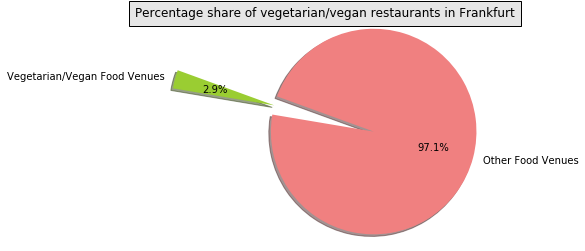

In [155]:
import matplotlib.pyplot as plt

# Data to plot
title = "Percentage share of vegetarian/vegan restaurants in Frankfurt"
labels = 'Vegetarian/Vegan Food Venues', 'Other Food Venues'
sizes = [18, 601]
colors = ['yellowgreen', 'lightcoral']
explode = (1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=160)
plt.title("Percentage share of vegetarian/vegan restaurants in Frankfurt", bbox={'facecolor':'0.9', 'pad':6})
plt.axis('equal')
plt.show()

#### Lets group the venues and adress them to the neighbourhoods
#### After reviewing the dataset, I have to mention that foursquare seem to be an outddated app, as from personal experience I know quite more places offering vegetarian/vegan food in the city of Frankfurt. For a similar project I would definitely choose another data provider


#### Once again I have to make the observation that the forsquare provides unsufficient number of venues compared to the real world. Nonetheless we can see that venues offering asian cuisine are more likely to offer vegetarian/vegan food too.  From personal observation I see the trend where the most of restaurants are offering at least one vegan/vegetarian dish nowadays.  

#### By using "onehot" we can define the types of restaurants offering vegan/vegetarian food per each neighbourhood


In [187]:
frankfurt_onehot = pd.get_dummies(ffm_veg_ven_sort[['Venue category']], prefix = '', prefix_sep='')
frankfurt_onehot['Neighbourhood']=ffm_veg_ven_sort['Neighbourhood']
fixed_columns = [frankfurt_onehot.columns[-1]]+list(frankfurt_onehot.columns[:-1])
frankfurt_onehot= frankfurt_onehot[fixed_columns]
frankfurt_onehot.shape
#grouping by neighbourhood
frankfurt_veg_grouped=frankfurt_onehot.groupby('Neighbourhood').mean()
frankfurt_veg_grouped.head()

,Chinese Restaurant,Indian Restaurant,Japanese Restaurant,Salad Place,Vegetarian / Vegan Restaurant
Neighbourhood,,,,,
Altstadt,0.0,0.000000,0.0,0.000000,1.000000
Bahnhofsviertel,0.5,0.000000,0.5,0.000000,0.000000
Dornbusch,0.0,0.000000,0.0,0.000000,1.000000
Gutleutviertel,0.0,0.000000,0.0,0.000000,1.000000
Innenstadt,0.0,0.333333,0.0,0.333333,0.333333


In [188]:
frankfurt_onehot = pd.get_dummies(ffm_all_ven_sort['Venue category'], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
frankfurt_onehot['Neighbourhood'] = ffm_all_ven_sort['Neighbourhood'] 

# move neighborhood column to the first column and reset index
fixed_columns = [frankfurt_onehot.columns[-1]] + list(frankfurt_onehot.columns[:-1])
frankfurt_onehot = frankfurt_onehot[fixed_columns]
frankfurt_grouped = frankfurt_onehot.groupby('Neighbourhood').mean().reset_index()

frankfurt_grouped.head(10)

,Neighbourhood,African Restaurant,American Restaurant,Apple Wine Pub,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Bagel Shop,Bakery,Bistro,...,Taco Place,Tapas Restaurant,Taverna,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Trattoria/Osteria,Turkish Restaurant,Vietnamese Restaurant,Wings Joint
0,Altstadt,0.028571,0.000000,0.0,0.0,0.028571,0.028571,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.028571,0.0
1,Bahnhofsviertel,0.040000,0.000000,0.0,0.0,0.080000,0.000000,0.0,0.040000,0.08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.040000,0.0
2,Bergen-Enkheim,0.000000,0.000000,0.0,0.0,0.500000,0.000000,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,Bockenheim,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.071429,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,Bornheim,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.100000,0.0
5,Dornbusch,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.166667,0.0
6,Eckenheim,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.000000,0.000000,0.0
7,Eschersheim,0.100000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,...,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
8,Fechenheim,0.000000,0.333333,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
9,Flughafen,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


#### Now lets have a look what are the most common venues for food in general in Frankfurt

In [189]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [191]:
num_top_venues = 10 #set the number to 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbour_sorted = pd.DataFrame(columns=columns)
neighbour_sorted['Neighbourhood'] = frankfurt_grouped['Neighbourhood']

for ind in np.arange(frankfurt_grouped.shape[0]):
    neighbour_sorted.iloc[ind, 1:] = return_most_common_venues(frankfurt_grouped.iloc[ind, :], num_top_venues)

#### In the below dataframe we can see the most common venues of Frankfurt sorted by neighbourhood
#### We can apply those results to our business idea by either choose the most common cuisine and transform it into vegetarian/venue place or choose a venue that is not very common yet

In [168]:
neighbour_sorted.head(5)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altstadt,Café,German Restaurant,Italian Restaurant,French Restaurant,Indian Restaurant,Steakhouse,Soup Place,Restaurant,Burger Joint,African Restaurant
1,Bahnhofsviertel,Middle Eastern Restaurant,Asian Restaurant,Bistro,African Restaurant,Irish Pub,Diner,Chinese Restaurant,Japanese Restaurant,Café,Restaurant
2,Bergen-Enkheim,Asian Restaurant,Italian Restaurant,Wings Joint,Falafel Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Eastern European Restaurant
3,Bockenheim,Italian Restaurant,Café,German Restaurant,French Restaurant,Pizza Place,Bakery,Sushi Restaurant,Steakhouse,Ramen Restaurant,Wings Joint
4,Bornheim,German Restaurant,Italian Restaurant,Café,Vietnamese Restaurant,Irish Pub,Spanish Restaurant,Malga,Wings Joint,English Restaurant,Dim Sum Restaurant



## K-mean Cluster for Frankfurt


In [192]:
from sklearn.cluster import KMeans
import numpy as np

kclusters = 5 # randomly choose the number of clusters for the first

# refine the dataframe
frankfurt_grouped_clustering = frankfurt_grouped.drop('Neighbourhood', 1)
frankfurt_grouped_clustering.reset_index()

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(frankfurt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 4], dtype=int32)

In [181]:
frankfurt_merged = ffm_all_count
frankfurt_merged['Cluster Labels'] = kmeans.labels_


#### In the below dataframe we can observe how many venues each Neighbourhood has und what are the most popular one. We can apply this results on the choice of venue category 


In [171]:

# merge manhattan_merged with neighborhoods_venues_sorted to add latitude/longitude for each neighborhood
frankfurt_merged_clean = frankfurt_merged.join(neighbour_sorted.set_index('Neighbourhood'), on='Neighbourhood')
frankfurt_merged_clean.reset_index(inplace=True)
frankfurt_merged_clean
                            


,Neighbourhood,Venue,Venue Latitude,Venue Longitude,Venue category,Id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Altstadt,35,35,35,35,35,0,Café,German Restaurant,Italian Restaurant,French Restaurant,Indian Restaurant,Steakhouse,Soup Place,Restaurant,Burger Joint,African Restaurant
1,Bahnhofsviertel,25,25,25,25,25,0,Middle Eastern Restaurant,Asian Restaurant,Bistro,African Restaurant,Irish Pub,Diner,Chinese Restaurant,Japanese Restaurant,Café,Restaurant
2,Bergen-Enkheim,2,2,2,2,2,5,Asian Restaurant,Italian Restaurant,Wings Joint,Falafel Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Eastern European Restaurant
3,Bockenheim,14,14,14,14,14,5,Italian Restaurant,Café,German Restaurant,French Restaurant,Pizza Place,Bakery,Sushi Restaurant,Steakhouse,Ramen Restaurant,Wings Joint
4,Bornheim,10,10,10,10,10,0,German Restaurant,Italian Restaurant,Café,Vietnamese Restaurant,Irish Pub,Spanish Restaurant,Malga,Wings Joint,English Restaurant,Dim Sum Restaurant
5,Dornbusch,6,6,6,6,6,0,German Restaurant,Burger Joint,Turkish Restaurant,Vietnamese Restaurant,Café,Latin American Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
6,Eckenheim,5,5,5,5,5,0,Thai Restaurant,Greek Restaurant,Café,Fast Food Restaurant,French Restaurant,Eastern European Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Friterie
7,Eschersheim,10,10,10,10,10,5,Italian Restaurant,German Restaurant,Tapas Restaurant,Indian Restaurant,Mexican Restaurant,Café,African Restaurant,Bagel Shop,Austrian Restaurant,Doner Restaurant
8,Fechenheim,3,3,3,3,3,5,American Restaurant,Restaurant,Italian Restaurant,Wings Joint,Falafel Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
9,Flughafen,1,1,1,1,1,6,Restaurant,Wings Joint,English Restaurant,Czech Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Eastern European Restaurant


In [200]:
# lets see how the cluster for each neighbourhood look like

frankfurt_clusters=frankfurt_merged_clean[['Neighbourhood','Cluster Labels']]
frankfurt_clusters

,Neighbourhood,Cluster Labels
0,Altstadt,0
1,Bahnhofsviertel,0
2,Bergen-Enkheim,5
3,Bockenheim,5
4,Bornheim,0
5,Dornbusch,0
6,Eckenheim,0
7,Eschersheim,5
8,Fechenheim,5
9,Flughafen,6


In [217]:
## Once again lets have a look how many veg venues are in each neighbourhood
veg_res_neigh=ffm_veg_count.filter(['Neighbourhood','Venue'], axis=1)
veg_res_neigh

,Venue
Neighbourhood,
Altstadt,3
Bahnhofsviertel,2
Dornbusch,2
Gutleutviertel,1
Innenstadt,3
Nordend-West,2
Oberrad,1
Ostend,2
Sachsenhausen-N,1


In [219]:
veg_res_cluster = pd.merge(veg_res_neigh, frankfurt_clusters, how='inner',on='Neighbourhood')

In [220]:
# Lets apply the Frankfurt clusters to our vegetarian/vegan dataframe
# some neighbourhoods have no veg. restaurans at all we need to merge the dataframe with left join and replace the NaNs with O
veg_res_cluster = pd.merge(frankfurt_clusters,veg_res_neigh , left_on='Neighbourhood', right_index=True, how='left', sort=False);
veg_res_cluster.fillna(0, inplace=True)
veg_res_cluster
    


,Neighbourhood,Cluster Labels,Venue
0,Altstadt,0,3.0
1,Bahnhofsviertel,0,2.0
2,Bergen-Enkheim,5,0.0
3,Bockenheim,5,0.0
4,Bornheim,0,0.0
5,Dornbusch,0,2.0
6,Eckenheim,0,0.0
7,Eschersheim,5,0.0
8,Fechenheim,5,0.0
9,Flughafen,6,0.0


#### In this step we want to see what neighbourhood have the lowest  to none number of venues

In [221]:
neigh_low_num = veg_res_cluster.loc[veg_res_cluster['Venue'] <= 1] # we choose 1 at it is the largest number of veg. venues in each neighbourhood

neigh_low_num



,Neighbourhood,Cluster Labels,Venue
2,Bergen-Enkheim,5,0.0
3,Bockenheim,5,0.0
4,Bornheim,0,0.0
6,Eckenheim,0,0.0
7,Eschersheim,5,0.0
8,Fechenheim,5,0.0
9,Flughafen,6,0.0
10,Frankfurter Berg,0,0.0
11,Gallus,0,0.0
12,Ginnheim,2,0.0


In [222]:

neigh_heigh_num = neigh_low_num[['Neighbourhood','Cluster Labels']].groupby('Cluster Labels').count()
neigh_heigh_num

,Neighbourhood
Cluster Labels,
0,21
1,2
2,2
3,1
4,1
5,9
6,2


## Results: Suitable neighbourhood for investment. 
#### Depending on business model, it is up to stakeholder to descide either to choose a popular neighbourhood or one that have no competitors.
#### In my example I will cosider neighbourhoods with less competition. 

In [223]:
where_to_open = frankfurt_merged_clean.loc[frankfurt_merged_clean['Cluster Labels'] == 5, frankfurt_merged_clean.columns[[0] + list(range(5, frankfurt_merged_clean.shape[1]))]]
where_to_open['Neighbourhood']

2      Bergen-Enkheim
3          Bockenheim
7         Eschersheim
8          Fechenheim
16             Hausen
17        Heddernheim
23    Nieder-Eschbach
31       Preungesheim
37           Seckbach
Name: Neighbourhood, dtype: object

## Discussion

In the early stage of data study we could already see that the choice for an vegetarian/vegan venue opening is big, there are barely venues (less then 3%) in the whole city. 
Indeed almost every neighbourhood would be a good choice and it is up to the stakeholder to decide either to open a venue in a popular, lively neighbourhood and have more competitors or choose a quite neighbourhood which could guarantee residents as loyal customers. 

What is lacking at this point is a systematic, quantitative way to identify and distinguish is the information whether the "normal" venues offer vegetarian/vegan dishes or not.

Further step would be to investigate the menues and see which ones a a popular choice for plant based lovers as well and determine which are considered as a good alternative. 



## Conclusion

Apps and tools like Foursquare API are usefull to have an insight into venues worldwide.

In the beginning I mentioned that we about to use segmentation and clustering hoping to determine:

- The similarity or dissimilarirty of neighbourhoods regarding the variety of food venues.
- Classification of area by popular food venues and where to find the best spot for opening a new venue.

We managed to reach that goal, the results are disappointing though due to the lack of information provided by Foursquare. 
As I mentioned before  the app is not updated in my perspective. 
Personally. I know the city very well and have a good overview regarding plant based venues. 
It may be possible, that Foursquare is just  not as popular among german citizens. For a similar project I for sure use another venue provider.

Thank you for reviewing and all the best for other certification of yours! We did it:)
